# Halpha Emitters S-PLUS

In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

In [2]:
# Open the CSV files
# Define the pattern to match CSV files
pattern = '../Ha-emitters/*PerField.csv'

# Use glob to find all CSV files in the current directory
csv_files = glob.glob(pattern)

# Create an empty list to store DataFrames
dfs = []

In [3]:
# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0013',b'iDR4_3_HYDRA-0013_0015750',154.559041,-24.256092,1246.0208,3215.7234,0.000261,0.800965,5.601852e-07,3.424156,...,NaN,NaN,NaN,NaN,20.143620,0.102,NaN,NaN,NaN,NaN
1,b'HYDRA-0014',b'iDR4_3_HYDRA-0014_0033904',155.185702,-23.884339,6690.9863,5659.0760,0.000295,0.913361,6.768905e-07,3.690729,...,NaN,NaN,NaN,NaN,20.129152,0.091,18.783773,0.103,18.771698,0.057
2,b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0004783',159.478848,-24.429063,8606.4780,2088.5144,0.000710,1.160942,7.702546e-07,4.263974,...,NaN,NaN,NaN,NaN,NaN,NaN,18.760456,0.051,18.287060,0.091
3,b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0009083',160.646313,-24.254456,1643.3098,3228.3699,0.000589,0.963045,8.869599e-07,4.031962,...,NaN,NaN,19.781994,0.167,19.213665,0.089,18.930437,0.164,18.760265,0.117
4,b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0031280',159.619490,-23.257862,7788.8887,9757.6770,0.000699,1.142811,1.143711e-06,4.497892,...,NaN,NaN,NaN,NaN,18.826166,0.073,18.305933,0.075,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,b'STRIPE82-0162',b'iDR4_3_STRIPE82-0162_0022698',353.282632,0.804081,3083.8176,6181.8706,0.000288,0.854926,7.235725e-07,3.873397,...,19.179667,0.069,19.196667,0.075,19.071667,0.062,18.176924,0.043,18.751373,0.070
3660,b'STRIPE82-0167',b'iDR4_3_STRIPE82-0167_0008521',357.370115,-1.152678,4160.4697,2537.4048,0.000348,1.048967,1.283758e-06,4.131924,...,19.042799,0.069,18.987799,0.053,18.910799,0.052,18.237318,0.025,18.463594,0.050
3661,b'STRIPE82-0169',b'iDR4_3_STRIPE82-0169_0005989',358.799382,-1.159860,4082.3037,2490.3848,0.000419,0.991255,2.217400e-06,3.601053,...,NaN,NaN,NaN,NaN,19.033800,0.110,17.114317,0.127,16.015594,0.019
3662,b'STRIPE82-0169',b'iDR4_3_STRIPE82-0169_0024718',358.311745,-0.305703,7273.9053,8081.3730,0.000425,1.004401,1.213735e-06,4.116498,...,17.728844,0.049,17.684843,0.048,17.587843,0.043,18.055393,0.141,18.459343,0.089


In [5]:
for columns in combined_df.columns:
    print(columns)

Field
ID
RA
DEC
X
Y
FWHM
FWHM_n
ISOarea
KRON_RADIUS
MU_MAX_INST
PETRO_RADIUS
SEX_FLAGS_DET
SEX_NUMBER_DET
CLASS_STAR
s2n_DET_PStotal
THETA
ELLIPTICITY
ELONGATION
FLUX_RADIUS_20
FLUX_RADIUS_50
FLUX_RADIUS_70
FLUX_RADIUS_90
s2n_r_PStotal
s2n_J0660_PStotal
s2n_i_PStotal
FWHM_r
FWHM_n_r
FWHM_J0660
FWHM_n_J0660
FWHM_i
FWHM_n_i
SEX_FLAGS_r
SEX_FLAGS_J0660
SEX_FLAGS_i
CLASS_STAR_r
CLASS_STAR_J0660
CLASS_STAR_i
r_PStotal
e_r_PStotal
g_PStotal
e_g_PStotal
i_PStotal
e_i_PStotal
u_PStotal
e_u_PStotal
z_PStotal
e_z_PStotal
J0378_PStotal
e_J0378_PStotal
J0395_PStotal
e_J0395_PStotal
J0410_PStotal
e_J0410_PStotal
J0430_PStotal
e_J0430_PStotal
J0515_PStotal
e_J0515_PStotal
J0660_PStotal
e_J0660_PStotal
J0861_PStotal
e_J0861_PStotal
r_psf
e_r_psf
g_psf
e_g_psf
i_psf
e_i_psf
u_psf
e_u_psf
z_psf
e_z_psf
J0378_psf
e_J0378_psf
J0395_psf
e_J0395_psf
J0410_psf
e_J0410_psf
J0430_psf
e_J0430_psf
J0515_psf
e_J0515_psf
J0660_psf
e_J0660_psf
J0861_psf
e_J0861_psf


In [6]:
# Cleaned error

m_err = (combined_df["e_r_PStotal"] <= 0.2) & (combined_df["e_g_PStotal"] <= 0.2) & \
        (combined_df["e_i_PStotal"] <= 0.2) & (combined_df["e_u_PStotal"] <= 0.2) & \
        (combined_df["e_J0378_PStotal"] <= 0.2) & (combined_df["e_J0395_PStotal"] <= 0.2) & \
        (combined_df["e_J0410_PStotal"] <= 0.2) & (combined_df["e_J0430_PStotal"] <= 0.2) & \
        (combined_df["e_J0515_PStotal"] <= 0.2) & (combined_df["e_J0660_PStotal"] <= 0.2) & \
        (combined_df["e_J0861_PStotal"] <= 0.2) & (combined_df["e_z_PStotal"] <= 0.2)


In [7]:
df_cleanErr = combined_df[m_err]
len(df_cleanErr)

2201

In [8]:
#Selecting columns
columns = ["r_PStotal",
"g_PStotal",
"i_PStotal",
"u_PStotal",
"z_PStotal",
"J0378_PStotal",
"J0395_PStotal",
"J0410_PStotal",
"J0430_PStotal",
"J0515_PStotal",
"J0660_PStotal",
"J0861_PStotal"]

In [9]:
df_mag = df_cleanErr[columns]
df_mag

,r_PStotal,g_PStotal,i_PStotal,u_PStotal,z_PStotal,J0378_PStotal,J0395_PStotal,J0410_PStotal,J0430_PStotal,J0515_PStotal,J0660_PStotal,J0861_PStotal
3,18.949287,19.270782,18.755087,20.251724,18.816505,19.858757,19.768074,19.603971,19.746395,19.093077,17.492000,18.729664
4,18.765036,19.017900,18.666340,20.272474,18.592777,19.741318,19.455805,19.395985,19.607445,18.744280,17.657127,18.734745
5,18.565330,18.934591,18.518396,19.290865,18.565490,18.957474,18.929663,18.850855,19.094093,19.050340,18.253527,18.561394
9,18.530138,18.905890,18.400469,19.014920,18.329327,18.776413,19.096212,18.962585,18.923103,18.941935,18.236492,18.337160
10,19.179417,19.535938,19.166569,19.595621,19.244514,19.505640,19.852362,19.594582,19.524601,19.546848,18.880930,19.309475
...,...,...,...,...,...,...,...,...,...,...,...,...
3658,18.328457,18.608263,18.249172,20.020405,18.250204,18.902287,17.923483,17.603200,17.381325,17.240381,17.466192,17.519514
3659,18.355907,18.676560,18.337378,18.942127,18.356768,18.738459,18.736965,18.727964,18.737740,18.654135,18.125902,18.337997
3660,18.483416,18.892693,18.393726,18.940979,18.339169,18.706509,19.004555,18.996195,18.946404,18.910423,18.197126,18.393461
3662,17.856941,17.613796,18.138280,17.856247,18.362268,17.839916,17.892450,17.689344,17.590504,17.553623,17.524510,18.345875


### Creating the colors 

In [10]:
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mag, 2))
len(color_index_pairs)

66

In [11]:
def calculate_earnings(df, index_pairs):
    for index_pair in index_pairs:
        color_index_name = f"{index_pair[0]} - {index_pair[1]}"
        df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
    return df

In [12]:
df_colors_mag = calculate_earnings(df_mag, color_index_pairs)

/tmp/ipykernel_144011/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_144011/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_144011/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [13]:
df_colors_mag

,r_PStotal,g_PStotal,i_PStotal,u_PStotal,z_PStotal,J0378_PStotal,J0395_PStotal,J0410_PStotal,J0430_PStotal,J0515_PStotal,...,J0410_PStotal - J0430_PStotal,J0410_PStotal - J0515_PStotal,J0410_PStotal - J0660_PStotal,J0410_PStotal - J0861_PStotal,J0430_PStotal - J0515_PStotal,J0430_PStotal - J0660_PStotal,J0430_PStotal - J0861_PStotal,J0515_PStotal - J0660_PStotal,J0515_PStotal - J0861_PStotal,J0660_PStotal - J0861_PStotal
3,18.949287,19.270782,18.755087,20.251724,18.816505,19.858757,19.768074,19.603971,19.746395,19.093077,...,-0.142424,0.510894,2.111971,0.874307,0.653318,2.254395,1.016731,1.601077,0.363413,-1.237664
4,18.765036,19.017900,18.666340,20.272474,18.592777,19.741318,19.455805,19.395985,19.607445,18.744280,...,-0.211460,0.651705,1.738858,0.661240,0.863165,1.950318,0.872700,1.087153,0.009535,-1.077618
5,18.565330,18.934591,18.518396,19.290865,18.565490,18.957474,18.929663,18.850855,19.094093,19.050340,...,-0.243238,-0.199485,0.597328,0.289461,0.043753,0.840566,0.532699,0.796813,0.488946,-0.307867
9,18.530138,18.905890,18.400469,19.014920,18.329327,18.776413,19.096212,18.962585,18.923103,18.941935,...,0.039482,0.020650,0.726093,0.625425,-0.018832,0.686611,0.585943,0.705443,0.604775,-0.100668
10,19.179417,19.535938,19.166569,19.595621,19.244514,19.505640,19.852362,19.594582,19.524601,19.546848,...,0.069981,0.047734,0.713652,0.285107,-0.022247,0.643671,0.215126,0.665918,0.237373,-0.428545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,18.328457,18.608263,18.249172,20.020405,18.250204,18.902287,17.923483,17.603200,17.381325,17.240381,...,0.221875,0.362819,0.137008,0.083686,0.140944,-0.084867,-0.138189,-0.225811,-0.279133,-0.053322
3659,18.355907,18.676560,18.337378,18.942127,18.356768,18.738459,18.736965,18.727964,18.737740,18.654135,...,-0.009776,0.073829,0.602062,0.389967,0.083605,0.611838,0.399743,0.528233,0.316138,-0.212095
3660,18.483416,18.892693,18.393726,18.940979,18.339169,18.706509,19.004555,18.996195,18.946404,18.910423,...,0.049791,0.085772,0.799069,0.602734,0.035981,0.749278,0.552943,0.713297,0.516962,-0.196335
3662,17.856941,17.613796,18.138280,17.856247,18.362268,17.839916,17.892450,17.689344,17.590504,17.553623,...,0.098840,0.135721,0.164834,-0.656531,0.036881,0.065994,-0.755371,0.029113,-0.792252,-0.821365


In [14]:
# Drop magniytudes
df_colors = df_colors_mag.drop(columns=columns)

In [15]:
df_colors

,r_PStotal - g_PStotal,r_PStotal - i_PStotal,r_PStotal - u_PStotal,r_PStotal - z_PStotal,r_PStotal - J0378_PStotal,r_PStotal - J0395_PStotal,r_PStotal - J0410_PStotal,r_PStotal - J0430_PStotal,r_PStotal - J0515_PStotal,r_PStotal - J0660_PStotal,...,J0410_PStotal - J0430_PStotal,J0410_PStotal - J0515_PStotal,J0410_PStotal - J0660_PStotal,J0410_PStotal - J0861_PStotal,J0430_PStotal - J0515_PStotal,J0430_PStotal - J0660_PStotal,J0430_PStotal - J0861_PStotal,J0515_PStotal - J0660_PStotal,J0515_PStotal - J0861_PStotal,J0660_PStotal - J0861_PStotal
3,-0.321495,0.194200,-1.302437,0.132782,-0.909470,-0.818787,-0.654684,-0.797108,-0.143790,1.457287,...,-0.142424,0.510894,2.111971,0.874307,0.653318,2.254395,1.016731,1.601077,0.363413,-1.237664
4,-0.252864,0.098696,-1.507438,0.172259,-0.976282,-0.690769,-0.630949,-0.842409,0.020756,1.107909,...,-0.211460,0.651705,1.738858,0.661240,0.863165,1.950318,0.872700,1.087153,0.009535,-1.077618
5,-0.369261,0.046934,-0.725535,-0.000160,-0.392144,-0.364333,-0.285525,-0.528763,-0.485010,0.311803,...,-0.243238,-0.199485,0.597328,0.289461,0.043753,0.840566,0.532699,0.796813,0.488946,-0.307867
9,-0.375752,0.129669,-0.484782,0.200811,-0.246275,-0.566074,-0.432447,-0.392965,-0.411797,0.293646,...,0.039482,0.020650,0.726093,0.625425,-0.018832,0.686611,0.585943,0.705443,0.604775,-0.100668
10,-0.356521,0.012848,-0.416204,-0.065097,-0.326223,-0.672945,-0.415165,-0.345184,-0.367431,0.298487,...,0.069981,0.047734,0.713652,0.285107,-0.022247,0.643671,0.215126,0.665918,0.237373,-0.428545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,-0.279806,0.079285,-1.691948,0.078253,-0.573830,0.404974,0.725257,0.947132,1.088076,0.862265,...,0.221875,0.362819,0.137008,0.083686,0.140944,-0.084867,-0.138189,-0.225811,-0.279133,-0.053322
3659,-0.320653,0.018529,-0.586220,-0.000861,-0.382552,-0.381058,-0.372057,-0.381833,-0.298228,0.230005,...,-0.009776,0.073829,0.602062,0.389967,0.083605,0.611838,0.399743,0.528233,0.316138,-0.212095
3660,-0.409277,0.089690,-0.457563,0.144247,-0.223093,-0.521139,-0.512779,-0.462988,-0.427007,0.286290,...,0.049791,0.085772,0.799069,0.602734,0.035981,0.749278,0.552943,0.713297,0.516962,-0.196335
3662,0.243145,-0.281339,0.000694,-0.505327,0.017025,-0.035509,0.167597,0.266437,0.303318,0.332431,...,0.098840,0.135721,0.164834,-0.656531,0.036881,0.065994,-0.755371,0.029113,-0.792252,-0.821365


# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [16]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [17]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [18]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]
n_neighbors_range = [5, 10, 20, 50, 100]

best_num_components = None
best_n_neighbors = None
best_silhouette_score = -1  # Initialize with a low value

In [19]:
# Loop over different numbers of components and neighbors
for num_components in num_components_range:
    for n_neighbors in n_neighbors_range:
        # Fit UMAP model
        reducer_ = umap.UMAP(n_neighbors=n_neighbors, n_components=num_components, random_state=42)
        X_train_trans = reducer_.fit_transform(X_train)

        # Cluster the transformed data using KMeans
        kmeans = KMeans(n_clusters=num_components, random_state=42)
        labels = kmeans.fit_predict(X_train_trans)

        # Evaluate performance on validation set using Silhouette Score
        silhouette = silhouette_score(X_train_trans, labels, random_state=42)
        print(f"Number of components: {num_components}, Number of neighbors: {n_neighbors}, Silhouette Score: {silhouette}")

        # Update best parameters if necessary
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_num_components = num_components
            best_n_neighbors = n_neighbors
            best_labels = labels

/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 5, Silhouette Score: 0.41863903403282166


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 10, Silhouette Score: 0.6501752734184265


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 20, Silhouette Score: 0.7351366877555847


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 50, Silhouette Score: 0.8018847107887268


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 100, Silhouette Score: 0.7399470806121826


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 5, Silhouette Score: 0.5306706428527832


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 10, Silhouette Score: 0.5342141389846802


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 20, Silhouette Score: 0.5651445388793945


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 50, Silhouette Score: 0.6025110483169556


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 100, Silhouette Score: 0.6033376455307007


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 5, Silhouette Score: 0.4417625367641449


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 10, Silhouette Score: 0.45096078515052795


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 20, Silhouette Score: 0.5826399326324463


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 50, Silhouette Score: 0.5432069897651672


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 100, Silhouette Score: 0.6220677495002747


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 5, Silhouette Score: 0.47533494234085083


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 10, Silhouette Score: 0.483241468667984


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 20, Silhouette Score: 0.5195846557617188


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 50, Silhouette Score: 0.5051116943359375


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 100, Silhouette Score: 0.5584782958030701


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 5, Silhouette Score: 0.5153245329856873


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 10, Silhouette Score: 0.5297935009002686


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 20, Silhouette Score: 0.4930473268032074


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 50, Silhouette Score: 0.46072909235954285


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 100, Silhouette Score: 0.49786126613616943


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 5, Silhouette Score: 0.4457641541957855


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 10, Silhouette Score: 0.4680347740650177


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 20, Silhouette Score: 0.47154566645622253


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 50, Silhouette Score: 0.41703492403030396


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 100, Silhouette Score: 0.4750482738018036


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 5, Silhouette Score: 0.4475260078907013


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 10, Silhouette Score: 0.43169236183166504


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 20, Silhouette Score: 0.4170331060886383


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 50, Silhouette Score: 0.387492835521698


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 100, Silhouette Score: 0.3844617009162903


In [20]:
# Output best parameters and corresponding silhouette score
print(f"Best number of components: {best_num_components}, Best number of neighbors: {best_n_neighbors}, Best Silhouette Score: {best_silhouette_score}")


Best number of components: 2, Best number of neighbors: 50, Best Silhouette Score: 0.8018847107887268


#### Try UMAP

In [21]:
num_components = 2
reducer = umap.UMAP(n_neighbors=50, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Visualize the cumulative explained variance ratio:

In [22]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

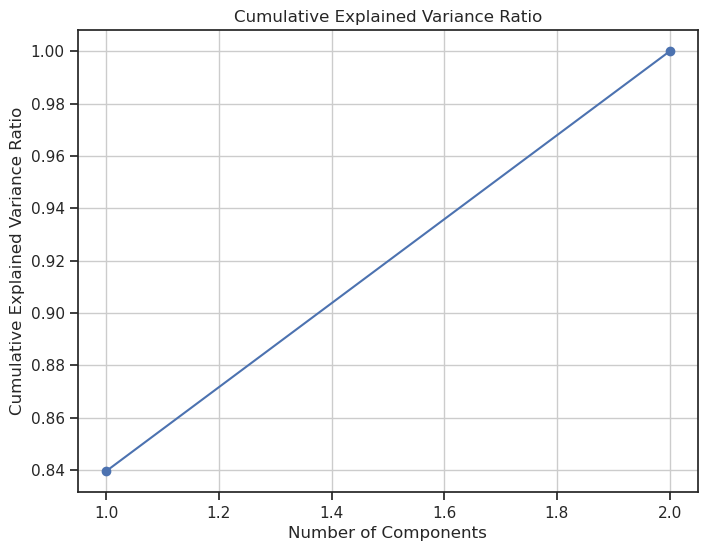

In [23]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [24]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2
0,14.999818,-6.104172
1,14.992889,-6.389965
2,-8.175042,2.962355
3,-7.624310,3.373553
4,-8.802399,3.134392
...,...,...
2196,12.855128,-7.124317
2197,-8.547464,2.897569
2198,-7.815834,3.384902
2199,-9.878316,3.289599


/tmp/ipykernel_144011/1329027073.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))


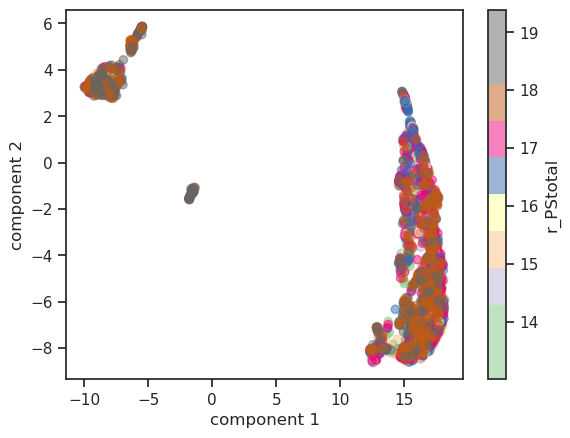

In [25]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_cleanErr["r_PStotal"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()

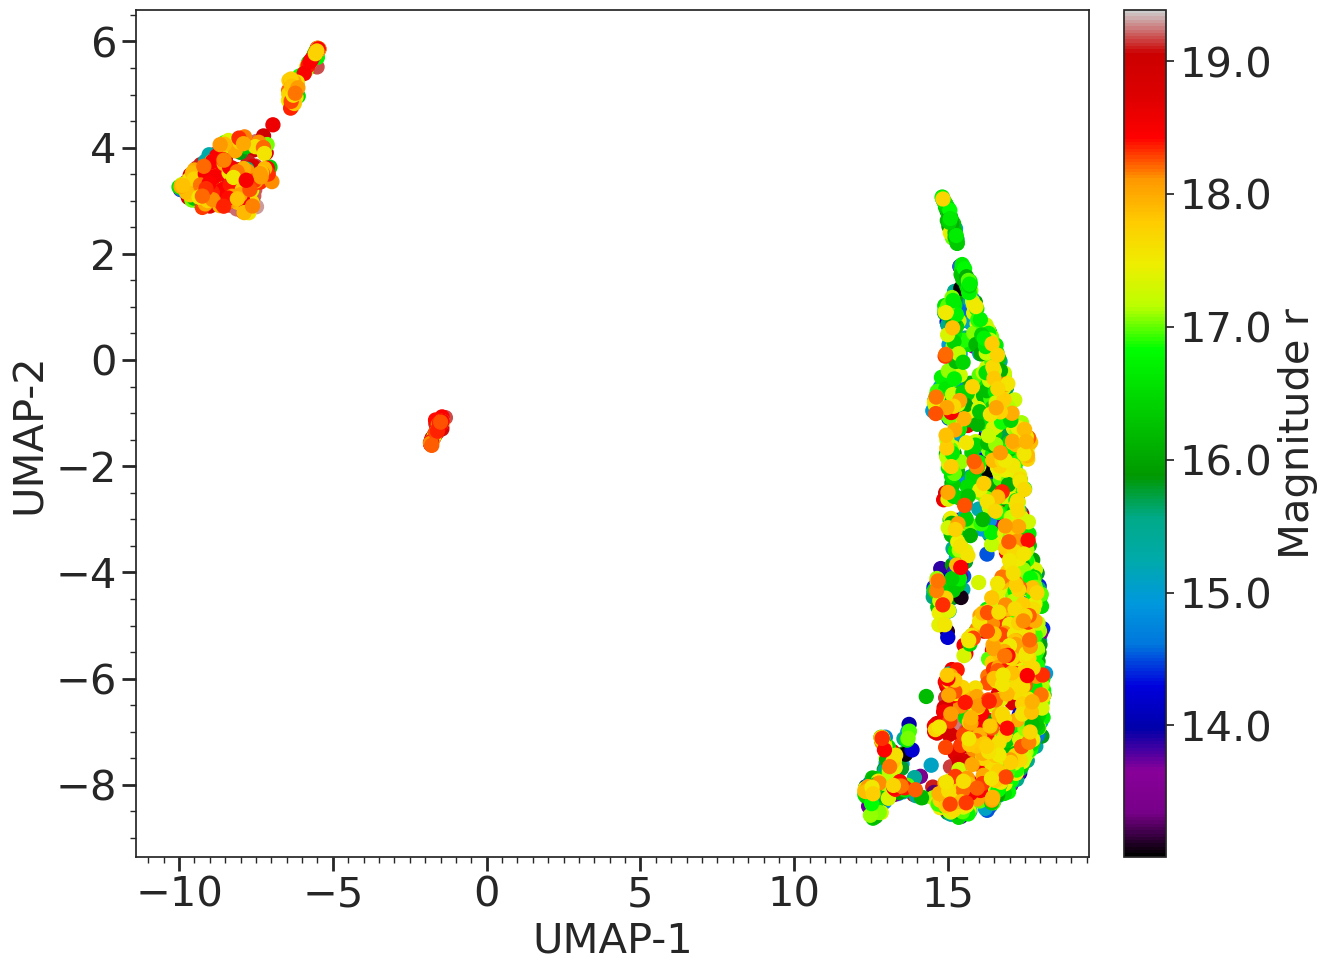

In [26]:
from matplotlib.ticker import MultipleLocator, NullFormatter

# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    plt.xlabel("UMAP-1", fontsize=30)
    plt.ylabel("UMAP-2", fontsize=30)
    plt.tick_params(axis='x', labelsize=30, width=2, length=10)  # Adjusting width of tick marks
    plt.tick_params(axis='y', labelsize=30, width=2, length=10)  # Adjusting width of tick marks

    # Create a scatter plot
    sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], c=df_cleanErr["r_PStotal"], cmap="nipy_spectral", s=100)
    
    # Add minor tick locators without showing the minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label("Magnitude r", fontsize=30)  # Provide a label for the colorbar
    cbar.ax.tick_params(labelsize=30)  # Adjust the size of the tick labels

plt.savefig("../Figs/umap_splus.pdf")

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [27]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [28]:
best_score = -1
best_params = {}


In [29]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [30]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 5, 'min_cluster_size': 100}
Best silhouette score: 0.8336711


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 100. We try then: 
But first try this min_samples=15, min_cluster_size=60

In [31]:
clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=50, 
                             prediction_data=True, gen_min_span_tree=True)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [32]:

clusterer.fit(X_trans)
labels = clusterer.labels_
len(labels)

2201

In [33]:
clusterer.metric

'euclidean'

In [34]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_noise_ = list(labels).count(-1)


In [35]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of cluster points 0: 1708
Estimated number of cluster points 1: 62
Estimated number of cluster points 2: 97
Estimated number of cluster points 3: 334
Estimated number of noise points: 0


<Axes: >

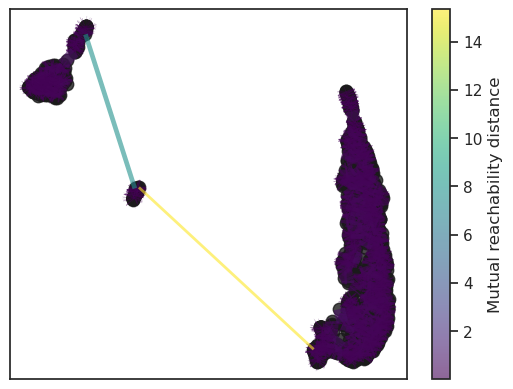

In [36]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<Axes: ylabel='distance'>

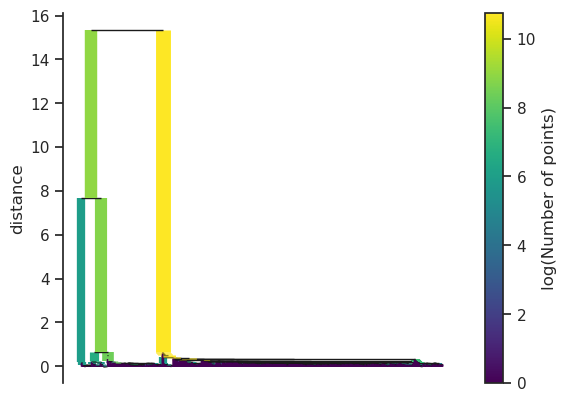

In [37]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<Axes: ylabel='$\\lambda$ value'>

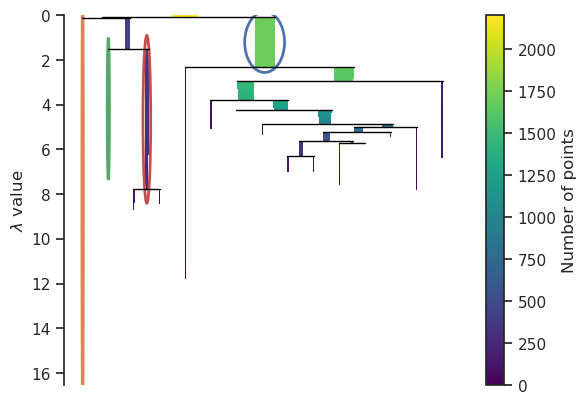

In [38]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

<Axes: xlabel='PC1', ylabel='PC2'>

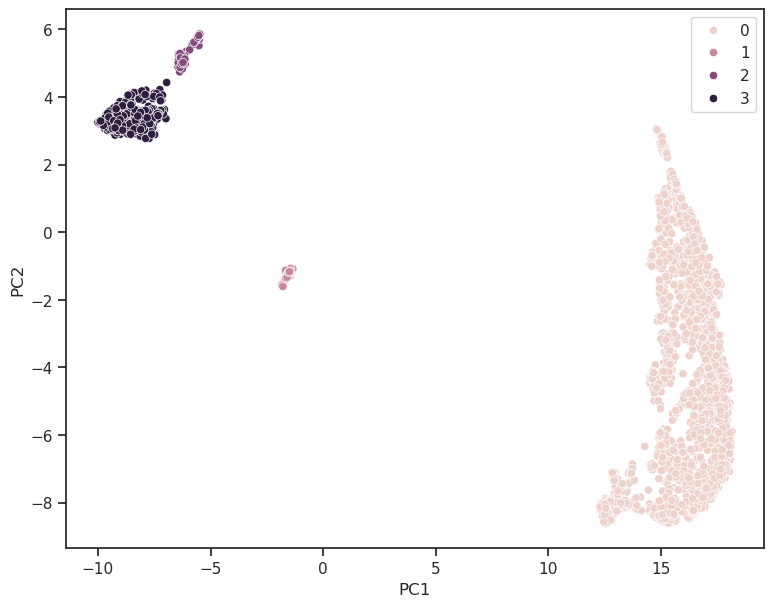

In [39]:

plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

In [40]:
# Concatenat the original claen table with the umap results
df_cleanErr.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_cleanErr, umap_df], axis=1)
df_cleanErr_umap

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,PC1,PC2
0,b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0009083',160.646313,-24.254456,1643.3098,3228.3699,0.000589,0.963045,8.869599e-07,4.031962,...,19.781994,0.167,19.213665,0.089,18.930437,0.164,18.760265,0.117,14.999818,-6.104172
1,b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0031280',159.619490,-23.257862,7788.8887,9757.6770,0.000699,1.142811,1.143711e-06,4.497892,...,NaN,NaN,18.826166,0.073,18.305933,0.075,NaN,NaN,14.992889,-6.389965
2,b'HYDRA-0018',b'iDR4_3_HYDRA-0018_0039179',161.457729,-23.596458,5984.7544,7544.1094,0.000516,0.948438,1.307099e-06,4.209613,...,19.119215,0.110,18.983215,0.086,18.312649,0.024,18.622478,0.059,-8.175042,2.962355
3,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0040902',151.445177,-25.186190,3863.6428,6244.8184,0.000256,0.902612,7.935957e-07,3.533032,...,18.971100,0.060,19.024100,0.061,18.295483,0.033,18.399050,0.056,-7.624310,3.373553
4,b'HYDRA-0022',b'iDR4_3_HYDRA-0022_0004409',152.343182,-25.911971,7761.9585,1492.4664,0.000348,0.914388,6.535494e-07,3.769080,...,19.703499,0.092,19.707500,0.065,18.943504,0.038,19.290354,0.090,-8.802399,3.134392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,b'STRIPE82-0160',b'iDR4_3_STRIPE82-0160_0036599',350.880512,1.134995,9529.0380,8348.2210,0.000337,1.101873,1.003665e-06,4.397247,...,17.425205,0.043,17.436205,0.044,17.960396,0.046,18.049135,0.063,12.855128,-7.124317
2197,b'STRIPE82-0162',b'iDR4_3_STRIPE82-0162_0022698',353.282632,0.804081,3083.8176,6181.8706,0.000288,0.854926,7.235725e-07,3.873397,...,19.196667,0.075,19.071667,0.062,18.176924,0.043,18.751373,0.070,-8.547464,2.897569
2198,b'STRIPE82-0167',b'iDR4_3_STRIPE82-0167_0008521',357.370115,-1.152678,4160.4697,2537.4048,0.000348,1.048967,1.283758e-06,4.131924,...,18.987799,0.053,18.910799,0.052,18.237318,0.025,18.463594,0.050,-7.815834,3.384902
2199,b'STRIPE82-0169',b'iDR4_3_STRIPE82-0169_0024718',358.311745,-0.305703,7273.9053,8081.3730,0.000425,1.004401,1.213735e-06,4.116498,...,17.684843,0.048,17.587843,0.043,18.055393,0.141,18.459343,0.089,-9.878316,3.289599


Create the tables for each clase

In [41]:
df_cleanErr_umap["Label"] = labels

In [42]:
df_cleanErr_umap

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf,PC1,PC2,Label
0,b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0009083',160.646313,-24.254456,1643.3098,3228.3699,0.000589,0.963045,8.869599e-07,4.031962,...,0.167,19.213665,0.089,18.930437,0.164,18.760265,0.117,14.999818,-6.104172,0
1,b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0031280',159.619490,-23.257862,7788.8887,9757.6770,0.000699,1.142811,1.143711e-06,4.497892,...,NaN,18.826166,0.073,18.305933,0.075,NaN,NaN,14.992889,-6.389965,0
2,b'HYDRA-0018',b'iDR4_3_HYDRA-0018_0039179',161.457729,-23.596458,5984.7544,7544.1094,0.000516,0.948438,1.307099e-06,4.209613,...,0.110,18.983215,0.086,18.312649,0.024,18.622478,0.059,-8.175042,2.962355,3
3,b'HYDRA-0021',b'iDR4_3_HYDRA-0021_0040902',151.445177,-25.186190,3863.6428,6244.8184,0.000256,0.902612,7.935957e-07,3.533032,...,0.060,19.024100,0.061,18.295483,0.033,18.399050,0.056,-7.624310,3.373553,3
4,b'HYDRA-0022',b'iDR4_3_HYDRA-0022_0004409',152.343182,-25.911971,7761.9585,1492.4664,0.000348,0.914388,6.535494e-07,3.769080,...,0.092,19.707500,0.065,18.943504,0.038,19.290354,0.090,-8.802399,3.134392,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,b'STRIPE82-0160',b'iDR4_3_STRIPE82-0160_0036599',350.880512,1.134995,9529.0380,8348.2210,0.000337,1.101873,1.003665e-06,4.397247,...,0.043,17.436205,0.044,17.960396,0.046,18.049135,0.063,12.855128,-7.124317,0
2197,b'STRIPE82-0162',b'iDR4_3_STRIPE82-0162_0022698',353.282632,0.804081,3083.8176,6181.8706,0.000288,0.854926,7.235725e-07,3.873397,...,0.075,19.071667,0.062,18.176924,0.043,18.751373,0.070,-8.547464,2.897569,3
2198,b'STRIPE82-0167',b'iDR4_3_STRIPE82-0167_0008521',357.370115,-1.152678,4160.4697,2537.4048,0.000348,1.048967,1.283758e-06,4.131924,...,0.053,18.910799,0.052,18.237318,0.025,18.463594,0.050,-7.815834,3.384902,3
2199,b'STRIPE82-0169',b'iDR4_3_STRIPE82-0169_0024718',358.311745,-0.305703,7273.9053,8081.3730,0.000425,1.004401,1.213735e-06,4.116498,...,0.048,17.587843,0.043,18.055393,0.141,18.459343,0.089,-9.878316,3.289599,3


**Preliminary conlusions**\\
Wiht the parameters recomended by the Silhouette HDBSCAM fin two group, on which one corresponds to the EB. BUt using (min_samples=15, min_cluster_size=60 HDBCAM find four group one coressponds to to the EB, aother to CV and QSOS and AGN, and the other two to QSOS each one corresnp a specific redshift.

In [43]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")

In [44]:
# Define the directory where you want to save the CSV files
directory = '../Class_allflters_err/'

In [45]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_noise.csv'
    else:
        filename = f'Halpha_emitter_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)